# Computational Methods in Economics

## Tutorial 2e - Object-Oriented Programming

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-12-18 11:46:35.572166


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

from turtle import *
from shapes import *
from random import randint

import webbrowser

from importlib import reload

## This Lecture

- [Introduction](#intro)
- [Writing Your Own Class](#own)
- [Appendix: Defining an Economic Model as a Class](#df)

----------------------------------------------------------------------------------------------------------------------

### Introduction

In the context of scikit-learn, we have encountered and used examples of *classes*. Recall the notation, e.g. for the **LinearRegression()** class:

In [3]:
## call instance of LinearRegression()
lr = LinearRegression()
## use a method -> not applicable here, since we do not have data 
# lr.fit(X, y)
## check attributes
# lr.coef_

In the example above, **LinearRegression()** is the name of the class; calling the first line defines an *instance* of this class under the name **lr**. 

You can think of a class like the *blueprint*, e.g. for a house; that is, a recipe that tells you how to build, what goes where and so on. In this analogy, an instance would then be an actual house, built following the blueprint.

Classes are a very important concept in the context of *object-oriented programming (OOP)*. 

From Wikipedia: "OOP is a programming paradigm based on the concept of "objects", which may contain data, in the form of fields, often known as *attributes*; and code, in the form of procedures, often known as *methods*. A feature of objects is that an object's procedures can access and often modify the data fields of the object with which they are associated (*objects have a notion of "this" or "self"*). 

[...] There is significant diversity of OOP languages, but the most popular ones are *class-based*, meaning that objects are instances of classes, which typically also determine their type."

We have encountered a number of variable types that fit this description of objects. For example, consider a NumPy array: it obviously contains data, and it has attributes (e.g. **.shape**) and methods (e.g. **.mean()**) associated with it.

There are also methods that can directly modify the attributes of a NumPy attributes, e.g. **.resize()**.

In [4]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
A.resize((4,1))
print(A.shape)
print(A)

(2, 2)
(4, 1)
[[1]
 [2]
 [3]
 [4]]


In this sense, we have used OOP since the start of this course! The new feature in this lecture is that Python lets you write your own classes, and hence define your own kind of objects.

We will first look at a simple but fun example to get an idea how it works. In the appendix, we turn to a more useful example and discuss why and when writing your own classes may be a good idea.

----------------------------------------------------------------------------------------------------------------------
<a id = 'own'></a>

### Writing your own class

Below, we will define a class called **Santa**. Here, we import it from the **christmas** module to illustrate its features. 

In [5]:
from christmas import Santa

First, we create an instance of the class, and provide it with four arguments: the color (a string) of Santa's hat, the number of gifts he's bringing, his degree of "jolliness" and his favorite Christmas song (a string). The syntax below indicates that the latter two are *optional* arguments, i.e. have default values.    

In [6]:
santa_claus = Santa("red", 4, jolliness = 1, favorite_song = 'https://www.youtube.com/watch?v=76WFkKp8Tjs')
type(santa_claus)

christmas.Santa

Each instance of the Santa class has a number of *attributes*, that we can access by the name of the attribute, attached to the name of the instance by a dot (like a method, bit without parentheses). For example, we can print the number of gifts and how jolly **santa_claus** is:

In [7]:
print( santa_claus.num_of_gifts )

4


In [8]:
print( santa_claus.jolly )

1


Note that a class can also have attributes that were not given as inputs:

In [9]:
print( santa_claus.HOME )

North Pole


Next, the class has a number of methods, for example to pack more gifts. Note that this will change the **num_of_gifts** attribute of the instance:

In [10]:
santa_claus.add_gift(2)
print( santa_claus.num_of_gifts )

6


Similarly, Santa also gives gifts, which increases his level of jolliness:

In [11]:
santa_claus.give_gift()
print( santa_claus.num_of_gifts )
print( santa_claus.jolly )

5
2


The next method asks a Santa to be jolly: 

In [12]:
santa_claus.be_jolly()

Ho! 
Ho! 
Merry Christmas!


We can also directly change an attribute level:

In [13]:
santa_claus.jolly = 3
santa_claus.be_jolly()

Ho! 
Ho! 
Ho! 
Merry Christmas!


Next, let's play Santa's favorite christmas song, and draw its head:

In [14]:
santa_claus.play_song()  ## opens Youtube link in new browser window

In [15]:
# santa_claus.draw_hat()   ## Note: this uses the "Turtle" class (see below), which may lead to issues when running from a Jupyter notebook

The implementation of this class with these methods and attributes is given below:

In [15]:
# class Santa():
#     """ 
#     Creates a "Santa" class - purely for illustrating creating your own class :)
#     """
    
#     ## fixed variable
#     HOME = "North Pole"
    
#     def __init__(self, color, num_of_gifts, jolliness = 3, favorite_song = 'https://www.youtube.com/watch?v=76WFkKp8Tjs'):
#         """ 
#         Constructor function for the Santa class
#         """
#         self.color = color
#         self.num_of_gifts = num_of_gifts
#         self.jolly = jolliness
#         self.song = favorite_song
        
        
#     def add_gift(self, new_gifts):
#         """
#         Method that adds scalar 'new_gifts' to attribute 'num_of_gifts'
#         """
#         self.num_of_gifts += new_gifts
        
#     def give_gift(self):
#         """
#         Method that decreases attribute 'num_of_gifts' by 1 and increases attribute 'jolly' by 1.
#         """
#         if self.num_of_gifts > 0:
#             self.num_of_gifts -= 1
#             self.jolly += 1
#         else:
#             print('There are no more gifts left!')
          
#     def be_jolly(self):
#         """
#         Method that prints string "Ho!" for range(jolly) and prints "Merry Christmas"
#         """
#         for it in range(self.jolly):
#             print("Ho! ")
#         print("Merry Christmas!")    
    
#     def play_song(self):
#         """
#         Method that opens weblink given by attribute 'song'
#         """
#         webbrowser.open(self.song) 
    
#     def draw_hat(self):
#         """
#         Method that draws a santa hat using an instance of the "Turtle" class, with color given by attribute 'color'
#         """
#         ### Example taken from https://www.101computing.net/chirstmas-tree/
        
#         myPen = Turtle()
# #         myPen.shape("turtle")
#         myPen.speed(25)

#         window = turtle.Screen()
#         window.bgcolor("#FFFFFF")

#         draw_circle(myPen, "#69D9FF", 0, -200, 200)

#         draw_triangle(myPen, self.color, -100, -80, 200)
#         draw_circle(myPen, "white", 0, 70, 30)

#         for it in range(0, 200, 20):
#           draw_circle(myPen, "white", -90+it, -100, 20)

#         myPen.hideturtle()
#         done()

Note the following:

- Every class definition starts with the keyword **class**, followed by the name of the class. You would expect that the arguments (e.g. the color in the example above) follows in the parentheses, but this is not the case. For now, we leave the parentheses empty. 

- The second mandatory element for a class is the **__init__** function. As the name indicates, this "initializes" the instance, i.e. it creates an object in memory. It is also called a **constructor**. Within **__init__**, the attributes of the instance are defined.  
- What is slightly complex here is the use of the keyword **self**. Essentially, **self** refers to an instance of the class. It has to be used within the class definition whenever a method or an attribute of the class is called.

- The remaining elements in the class definition are the methods used above. Note that they all take **self** as argument, in addition to other arguments (e.g. the number of new gifts). The methods essentially work like functions, i.e. have **return** statements if something is to be returned. Moreover, you can access and change the values of the attributes within a method.

#### Class Inheritance

In the context of OOP, "inheritance" means that a class uses code constructed within another class. This is useful to avoid redundancies and save coding time.


One usually refers to a **child class** or **subclass** that inherits variables from a **parent class**. 

Because the child subclass is inheriting from the parent class, the child class can reuse the code of Parent, allowing the programmer to use fewer lines of code and decrease redundancy.

Consider the following example:

In [16]:
from christmas import Christkind

In [17]:
christkind = Christkind(5, "https://www.youtube.com/watch?v=lQnDNACTt9c")

The code for this class looks the like this:

In [18]:
# class Christkind(Santa):    
#     """ 
#     Creates a "child" class of the "parent" Santa class - purely for illustrating creating your own class :)
#     """
    
#     HOME = "Heaven"
    
#     def __init__(self, num_of_gifts, favorite_song = 'https://www.youtube.com/watch?v=76WFkKp8Tjs'):
#         """ 
#         Constructor function for the Christkind class - note that Christkind has less attributes than Santa!
#         """
#         self.num_of_gifts = num_of_gifts
#         self.song = favorite_song
        

Note the following:

- Inheritance is indicated by putting the name parent class in the parentheses of the child class.
- **Christkind** has its own init-function, which is different from **Santa**'s init function. This is not necessary: if **Christkind** did not have an init function, it would take the one from **Santa**.

- Even though we have not defined a method for **Christkind**, it can use the methods from **Santa**. However, note a potential source of error: we have given **Christkind** its own **init** function, without defining an attribute **jolly**. The method **give_gifts** in the **Santa** class refers to such an attribute, and hence running this for an instance of **Christkind** will throw an error.

In [19]:
print(christkind.HOME)

Heaven


In [20]:
christkind.add_gift(2)
christkind.num_of_gifts

7

In [21]:
# christkind.play_song()

In [23]:
## this will throw an error!
# christkind.give_gift()

In [22]:
christkind.draw_tree()

----------------------------------------------------------------------------------------------------------------------
<a id = 'ngm'></a>

## Appendix

### Defining an economic model as a class

In previous lectures, we have used the neoclassical growth model as an example for rootfinding (lecture 4) and optimization (lecture 5). Compare the lecture notes for a refresher on the model structure. 

Consider different instances of the NGM. What pieces of data that may be different between these instances? You may see differences in

- parameter values (e.g., running the model for different values for the discount factor $\beta$);
- functional forms (e.g. a Cobb-Douglas production function vs. a CES);
- dimensionality of the problem, i.e. how many choice variables are they in addition to investment?


Now, consider what different versions of the model have in common, given these differences:

- there is a resource constraint that relates production, consumption and investment in capital; if we substitute the resource constraint, per-period utility is a function of next-period capital, plus possibly more (labor, pollution, etc.)
- the objective function is always the sum of discounted per-period utility functions, which at the very least should be functions of consumption;
- solving it involves solving a minimization problem for the transition phase.

Based on these considerations, we can write a class that takes as inputs the (potentially) different data - parameters and functional forms - but contains the common features, in particular objective function and routines for solving for the steady state and the solution vectors over time. 

In [24]:
class NGM():
    """
    Implements the neoclassical growth model. 
    
    It allows for an arbitrary number of choice variables, but assumes next period's capital as a choice variable by default
    """
    
    
    def __init__(self, x, utility, choice, production, parameters, num_of_inputs):
        """
        Constructor function for the NGM class
        """
        ## the first input is the solution vector, i.e. initially the initial guess
        self.x = x
        ## the next two inputs are functions
        self.util = utility
        self.prod = production
        self.choice = choice
        ## then parameters; we assume that the input is a dictionary
        self.params = parameters
        self.num = num_of_inputs
        
        ## derived attributes
        self.T = int( len(self.x) / self.num )
        
        ## access kp: first T elements in x
        self.kp = self.choice(self.x, self.params)[0]
        
    def objective(self, z):
        """
        Method that computes the objective function (lifetime utility) for the NGM class, as a function of the vector z
        """
        return - ( self.params['beta']**(np.array(range(self.T))) @ self.util( z , self.prod, self.choice, self.params ) 
                   + (self.params['beta']**self.T/(1 - self.params['beta'])) *  
                      self.util( z, self.prod, self.choice, self.params, cv = True) )
    
    
    def solve_transition(self):
        """
        Method that applies SciPy's minimize function on the objective function of the NGM, using self.x as initial guess
        """
        res = scipy.optimize.minimize(self.objective, self.x, method = 'BFGS', tol = 1e-6)
        self.x = res.x
        self.res = res
        print(res.message)
        ## update decision vectors
        self.kp = self.choice(self.x, self.params)[0]
        
    ## plot capital over time
    def graph(self):
        """
        Method that plots the vector of next period's capital (self.kp)
        
        NOTE: it also plots a horizontal line at 1, which is the steady state for this SPECIFIC EXAMPLE; 
                a complete implementation of NGM should also include a method for computing the steady state of the problem
                and then use in the ax.hlines command below
        """
        fig, ax = plt.subplots()
        ax.plot(self.kp)
        ax.hlines(1, 0, T)

    

Based on the considerations above, every instance of an NGM is characterized by the following problem-specific data:
- a collection of parameters;
- a **choice** function that takes the solution vector **'x'** and divides it in the different variables (e.g. capital, labor etc.)

- a **prod** function that takes **'x'** and **choice** as inputs and returns a vector of outputs.
- a **util** function that takes **'x'**, **choice** and **prod** as inputs, and returns the vector of per -period utilities. 

With respect to parameters, note that instead of separate objects (scalars) for every parameter, we use a dictionary where the keys are the parameter names. This saves on coding time and simplifies the structure of the code. 

#### Examples

We consider the same example as in lecture 5a. Start by defining the parameter values. In contrast to before, we store all parameter values in a dictionary, rather than as individual scalars. This way, we have one input for parameters when defining an instance of **NGM**, rather than eight. 

In [25]:
params = dict()
params['beta'] = 0.8      # discount factor
params['nu'] = 2       # risk-aversion coefficient for consumption
params['eta'] = 1         # elasticity parameter for labor supply
## production
params['alpha'] = 0.25
params['delta'] = 0.1
## derived
params['A'] = (1 - params['beta'] * (1 - params['delta']))/(params['alpha']*params['beta'])  # normalization parameter for production function => steady state k = 1
params['B'] = (1 - params['alpha']) * params['A'] * (params['A'] - params['delta'])**(-params['nu'])   # normalization parameter for utility function => steady state h = 1
## initial capital stock
params['k0'] = 0.8

Next, we define the three problem-specific functions outlined above:

In [26]:
def choice1(x, params):
    """
    Implements the choice function for the a NGM with capital and labor
    """
    T = int(len(x)/2)
    
    kp = np.exp( x[:T] )
    k = np.insert(kp[:T-1], 0, params['k0'])
    h = np.exp( x[T:] )
    
    return kp, k, h


In [27]:
def cd1(x, choice, params):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs in x
    """
    kp, k, h = choice(x, params)
    
    return params['A'] * k**params['alpha'] * h**(1 - params['alpha'] )

In [28]:
def u1(x, prod, choice, params, cv = False):
    """
    Evaluates the per-period utility function for the NGM with capital and labor
    """
    kp, k, h = choice(x, params)
    
    if not cv:
        c = prod(x, choice, params) + (1 - params['delta']) * k - kp
        return c**(1 - params['nu'])/(1 -  params['nu']) -  params['B'] * h**(1 + params['eta'])/(1 +  params['eta'])
    else:
        c = params['A'] * kp[-1]**params['alpha'] * h[-1]**(1 - params['alpha'] ) - params['delta'] * kp[-1] 
        return c**(1 - params['nu'])/(1 -  params['nu']) -  params['B'] * h[-1]**(1 + params['eta'])/(1 +  params['eta'])
    
    

We then define an instance of the **NGM** class and use it to solve it the model:

In [29]:
## set time horizon
T = 30
## set initial guess    
x0 = 1e-6 * np.ones( 2 * T)

In [30]:
ngm1 = NGM(x0, u1, choice1, cd1, params, 2)
ngm1.objective(x0)

5.587996862002016

In [31]:
ngm1.solve_transition()

Optimization terminated successfully.


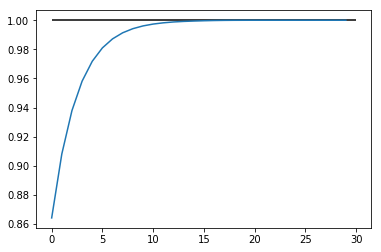

In [32]:
ngm1.graph()

#### Model 2: Energy as a production input

To illustrate the advantage of using classes for economic modeling, we modify the NGM considered above by adding energy $e$ as a third production factor. The production function now looks the following:

\begin{equation}
    f(k, h, e) = A k^\alpha e^\gamma h^{1-\alpha-\gamma}
\end{equation}

Moreover, we have to introduce a cost for energy use (otherwise the input of energy in $f$ would just be infinity). We assume a constant marginal cost of energy, denoted by $\xi$, which is paid in terms of the final good. The resource constraint then reads:

\begin{equation}
    k_{t+1} + c_t = f(k_t, h_t) + (1 - \delta) k_t = A k_t^\alpha h_t^{1-\alpha} + (1 - \delta) k_t - \xi e_t
\end{equation}

Hence, compared to above, we have to add two parameters - $\gamma$ and $\xi$ - and modify the problem-specific function:
- we need a **choice** function that divides the choice vector in three parts, for capital, labor and energy;
- the production function should now reflect three inputs;
- the utility function should account for the additional cost in the resource constraint.

Below, we define three function **choice2**, **prod2** and **util2** that implement these changes.

In [33]:
params['gamma'] = 0.05
params['xi'] = 0.1

def choice2(x, params):
    """
    Implements the choice function for the a NGM with capital, labor and energy
    """
    T = int(len(x)/3)
    
    kp = np.exp( x[:T] )
    k = np.insert(kp[:T-1], 0, params['k0'])
    h = np.exp( x[T : 2*T] )
    e = np.exp( x[2 * T : ] )
    
    return kp, k, h, e


def cd2(x, choice, params):
    """
    Evaluates the Cobb-Douglas function with coefficients alpha and gamma and shift parameter A, for three inputs in x
    """
    kp, k, h, e = choice(x, params)
    
    return params['A'] * k**params['alpha'] * e**params['gamma'] * h**(1 - params['alpha'] - params['gamma'] )

def u2(x, prod, choice, params, cv = False):
    """
    Evaluates the per-period utility function for the NGM with capital, labor and energy
    """
    kp, k, h, e = choice(x, params)
    
    if not cv:
        c = prod(x, choice, params) + (1 - params['delta']) * k - kp - params['xi'] * e
        return c**(1 - params['nu'])/(1 -  params['nu']) -  params['B'] * h**(1 + params['eta'])/(1 +  params['eta'])
    else:
        c = params['A'] * kp[-1]**params['alpha'] * e[-1]**params['gamma'] * h[-1]**(1 - params['alpha'] - params['gamma'])\
            - params['delta'] * kp[-1] - params['xi'] * e[-1]
        return c**(1 - params['nu'])/(1 -  params['nu']) -  params['B'] * h[-1]**(1 + params['eta'])/(1 +  params['eta'])    
    

Given these problem-specific pieces of data, we can define a *new instance* of the NGM class; note that we also need an initial **x0** of dimension $3T$.

In [34]:
T = 30
## set initial guess    
x0 = 1e-6 * np.ones( 3 * T)

In [35]:
ngm2 = NGM(x0, u2, choice2, cd2, params, 3)
ngm2.objective(x0)

5.945866774386963

Finally, we again rely on the class method defined above to solve the model and plot the time path for capital.

In [36]:
ngm2.solve_transition()

Optimization terminated successfully.


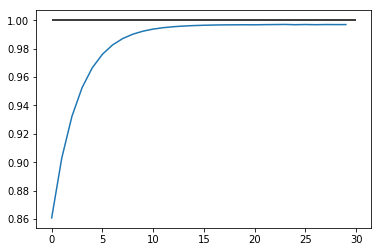

In [37]:
ngm2.graph()

Note that for this example, we have not actually computed the steady state values (for the first example, we knew that the steady state for labor and capital was $(1,1)$). As an exercise, think about how to add a computation of the steady state to the **NGM** class. 